In [1]:
import matplotlib.pyplot as plt

In [2]:
# Log file locations
FILE_1 = "./mesh_location.log"
FILE_2 = "./mesh_no_location.log"
FILE_3 = "./wifi_direct.log"

SAVE_PLOTS_LOCATION = "./plot_imgs/"

In [3]:
# Create folder to save plot images if not present already
import os

if not os.path.exists(SAVE_PLOTS_LOCATION):
    os.makedirs(SAVE_PLOTS_LOCATION)

In [4]:
def parse_file(file):
    nos_round_trip = 0
    nos_btn_press = 0

    total_resolution_time = 0
    total_round_trip_time = 0

    round_trip_times = []
    resolution_times = []

    def get_time_type(_time_type):
        if _time_type == "Round trip time":
            return 1
        if _time_type == "Resolution time" or _time_type == "Process resolution time":
            return 2
        return -1

    f = open(file, "r")
    process_ongoing = False
    count_ongoing_proc_round_trips = 0
    for x in f:
        splits = x.split(": ")
        time_type = get_time_type(splits[0])
        if time_type != -1:
            splits[1] = int(splits[1])
            if time_type == 1:
                nos_round_trip += 1
                total_round_trip_time += splits[1]
                if process_ongoing:
                    round_trip_times[len(round_trip_times) - 1] += splits[1]
                else:
                    round_trip_times.append(splits[1])

                count_ongoing_proc_round_trips += 1
                process_ongoing = True
            elif time_type == 2:
                nos_btn_press += 1
                total_resolution_time += splits[1]
                resolution_times.append(splits[1])

                round_trip_times[
                    len(round_trip_times) - 1
                ] /= count_ongoing_proc_round_trips

                process_ongoing = False
                count_ongoing_proc_round_trips = 0

    return (
        nos_round_trip,
        nos_btn_press,
        total_resolution_time,
        total_round_trip_time,
        round_trip_times,
        resolution_times,
    )

In [60]:
def plot_data(file):
    (
        nos_round_trip,
        nos_btn_press,
        total_resolution_time,
        total_round_trip_time,
        round_trip_times,
        resolution_times,
    ) = parse_file(file)

    file_name = (file.split("/"))[len(file.split("/")) - 1]

    x_vals = range(1, len(round_trip_times) + 1)

    plt.figure(figsize=(9, 6.5))
    plt.plot(
        x_vals, resolution_times, linestyle=":", label="Total Resolution Time Values", c = 'black', linewidth = 3
    )
    plt.plot(x_vals, round_trip_times, label="Avg. Round Trip Time Values", c = 'green')
    plt.ylabel("Time value in millisecs")
    plt.legend()
    # save figure
    plt.savefig(SAVE_PLOTS_LOCATION + file_name + ".png")
    plt.show()

    print(
        "\nFor "
        + file_name
        + ":\n  Average Round Trip Time \t  = "
        + "{:.2f}".format(total_round_trip_time / nos_round_trip)
        + "\n  Average Process Resolution Time = "
        + "{:.2f}".format(total_resolution_time / nos_btn_press)
    )

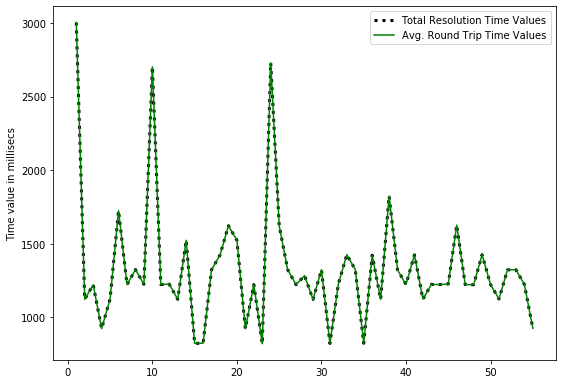


For mesh_location.log:
  Average Round Trip Time 	  = 1331.75
  Average Process Resolution Time = 1331.75


In [61]:
# For file 1
plot_data(FILE_1)

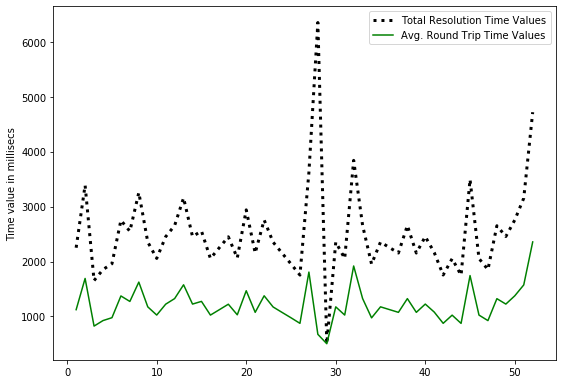


For mesh_no_location.log:
  Average Round Trip Time 	  = 1214.98
  Average Process Resolution Time = 2509.08


In [62]:
# For file 2
plot_data(FILE_2)

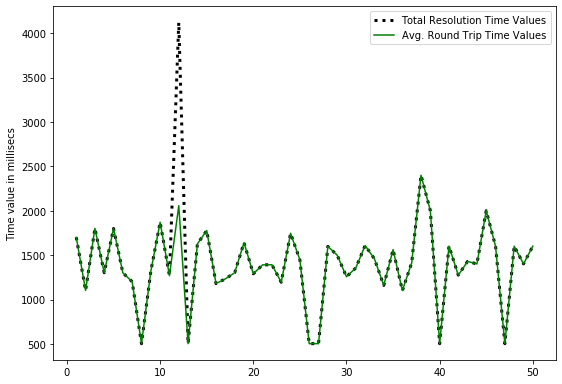


For wifi_direct.log:
  Average Round Trip Time 	  = 1399.20
  Average Process Resolution Time = 1427.28


In [63]:
# For file 3
plot_data(FILE_3)